In [6]:
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [7]:
# Load videos
EROS_video = cv2.VideoCapture("/home/bernard/Desktop/IIT_Thesis/ERO-SNN/EROS/MVSEC_short_outdoor/leftdvs/eros-out.mp4")
SCM_video = cv2.VideoCapture("/home/bernard/Desktop/IIT_Thesis/ERO-SNN/EROS_like/MVSEC_short_outdoor/YarpSpikeLog/SCM_IF_OUT_TEMP-tau=200.us-tauSpi=0.s-vt=0.1-vr=0.0-P=0-incoming_spikes=0-method_Neuron=exact-Num_Neighbours=8-beta=0.5-Wi=6.15-Wk=-10-method_Syn=exact-Sim_Clock=0.5ms-Sample_Perc=1.0-/scm-out.mp4")

# Check if the videos are the same length and frame rate
EROS_fps = EROS_video.get(cv2.CAP_PROP_FPS)
SCM_fps = SCM_video.get(cv2.CAP_PROP_FPS)
EROS_frames = EROS_video.get(cv2.CAP_PROP_FRAME_COUNT)
SCM_frames = SCM_video.get(cv2.CAP_PROP_FRAME_COUNT)
if EROS_fps != SCM_fps or EROS_frames != SCM_frames:
    print("Error: Videos are not the same length or frame rate.")
else:
    print("FPS of EROS video: ", EROS_fps, "Frames: ", EROS_frames)
    print("FPS of SCM video: ", SCM_fps, "Frames: ", SCM_frames)

FPS of EROS video:  33.333 Frames:  667.0
FPS of SCM video:  33.333 Frames:  667.0


In [8]:
ssim_scores = []
# Check if videos opened successfully
if not EROS_video.isOpened() or not SCM_video.isOpened():
    print("Error: Could not open one or both videos.")
    exit()

while True:
    # Read frames from both videos
    ret1, frame1 = EROS_video.read()
    ret2, frame2 = SCM_video.read()

    # Break the loop if any video ends
    if not ret1 or not ret2:
        break

    # Convert frames to grayscale
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
        # Apply binary threshold to convert to black and white
    _, bw1 = cv2.threshold(gray1, 254, 255, cv2.THRESH_BINARY)
    _, bw2 = cv2.threshold(gray2, 254, 255, cv2.THRESH_BINARY)

    score, _ = ssim(bw1, bw2, full=True)
    ssim_scores.append(score)
    # print(f"SSIM: {score}")

# Release video captures
EROS_video.release()
SCM_video.release()

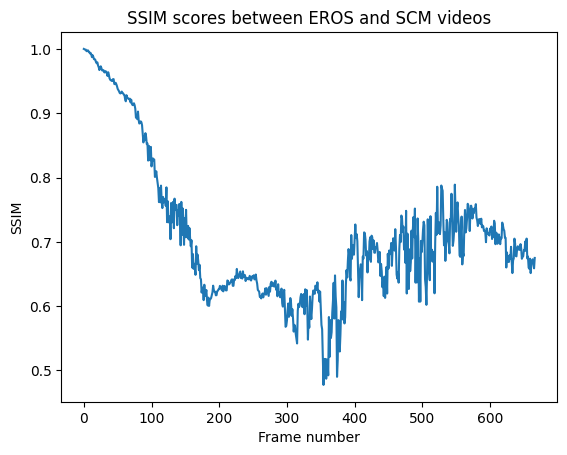

In [9]:
# Plot the variation of SSIM scores across the video
plt.plot(ssim_scores)
plt.xlabel("Frame number")
plt.ylabel("SSIM")
plt.title("SSIM scores between EROS and SCM videos")
plt.show()

In [10]:
# Doing a statistical analysis of the SSIM scores
import numpy as np
ssim_scores = np.array(ssim_scores)
mean_ssim = np.mean(ssim_scores)
std_ssim = np.std(ssim_scores)
print(f"Mean SSIM: {mean_ssim}")
print(f"Standard deviation of SSIM: {std_ssim}")

Mean SSIM: 0.7086572945124876
Standard deviation of SSIM: 0.11179215870456011
